In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

🧠**Analyze Death Age Difference: Right-Handers vs Left-Handers**
This project explores whether there is a noticeable difference in the average age at death between right-handed and left-handed individuals. The goal is to use data analysis and visualizations to examine patterns in lifespan based on handedness.

🔍**Key Steps:**
* Data cleaning and preprocessing

* Grouping by handedness

* Visualizing death age distributions

* Calculating average age at death

* Performing basic statistical tests

📂**Tools Used:**
* *Python (Pandas, Seaborn, Matplotlib, SciPy)*

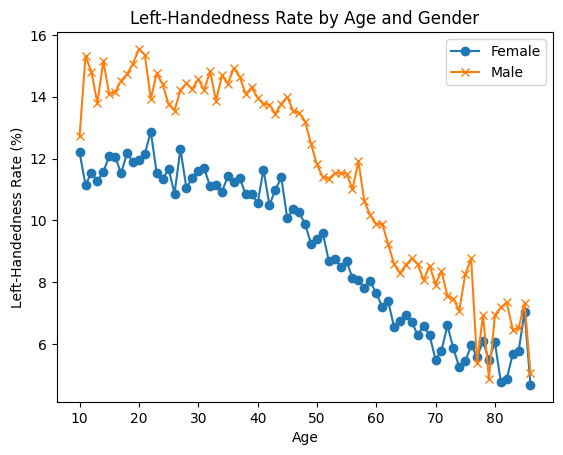

In [ ]:
#TASK1
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# load the data
data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data = pd.read_csv(data_url_1)

# plot male and female left-handedness rates vs. age
%matplotlib inline
fig, ax = plt.subplots()  # create figure and axis objects

ax.plot(lefthanded_data["Age"], lefthanded_data["Female"], label="Female", marker='o')
ax.plot(lefthanded_data["Age"], lefthanded_data["Male"], label="Male", marker='x')

ax.legend()  # add a legend
ax.set_xlabel("Age")
ax.set_ylabel("Left-Handedness Rate (%)")
ax.set_title("Left-Handedness Rate by Age and Gender")

# show the plot
plt.show()


***OBSERVATION***

Left-handedness is more common in younger age groups, especially among males. The rate declines steadily with age, likely due to older generations being encouraged to switch to right-handedness during childhood. This reflects societal influences rather than a natural change in handedness over time.



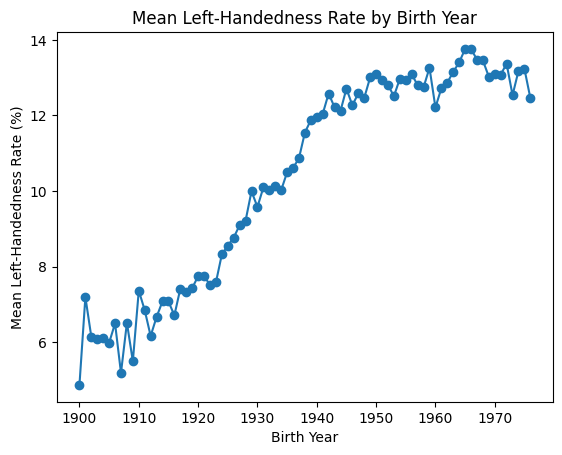

In [ ]:
#TASK2
# create a new column for birth year of each age
lefthanded_data["Birth_year"] = 1986 - lefthanded_data["Age"]

# create a new column for the average of male and female
lefthanded_data["Mean_lh"] = (lefthanded_data["Male"] + lefthanded_data["Female"]) / 2

# create a plot of the 'Mean_lh' column vs. 'Birth_year'
fig, ax = plt.subplots()
ax.plot(lefthanded_data["Birth_year"], lefthanded_data["Mean_lh"], marker='o')
ax.set_xlabel("Birth Year")
ax.set_ylabel("Mean Left-Handedness Rate (%)")
ax.set_title("Mean Left-Handedness Rate by Birth Year")

plt.show()


***OBSERVATION***

The mean left-handedness rate increases steadily for people born after 1920, peaking around the 1960s. This suggests growing social acceptance of left-handedness over time, with earlier generations likely underreporting due to societal pressure.

In [ ]:
import numpy as np

# Define the function
def P_lh_given_A(ages_of_death, study_year=1990):
    """ P(Left-handed | Age of death), calculated from reported left-handedness rates """

    # Average of last 10 points = earliest birth years = early 1900s
    early_1900s_rate = lefthanded_data['Mean_lh'].iloc[-10:].mean() / 100  # convert to probability

    # Average of first 10 points = latest birth years = late 1900s
    late_1900s_rate = lefthanded_data['Mean_lh'].iloc[:10].mean() / 100

    # Calculate birth years for given ages of death
    birth_years = study_year - ages_of_death

    # Data range: people aged 10 to 86 in 1986 (study year)
    youngest_birth_year = 1986 - 10
    oldest_birth_year = 1986 - 86

    # Create empty array for return values
    P_return = np.zeros(ages_of_death.shape)

    # Case 1: born before 1900s range (too old) → early_1900s_rate
    P_return[birth_years < oldest_birth_year] = early_1900s_rate

    # Case 2: born after 1900s range (too young) → late_1900s_rate
    P_return[birth_years > youngest_birth_year] = late_1900s_rate

    # Case 3: born within known range → use actual Mean_lh from dataset
    mask = np.logical_and(birth_years >= oldest_birth_year, birth_years <= youngest_birth_year)
    middle_rates = lefthanded_data.set_index('Birth_year').loc[birth_years[mask], 'Mean_lh'].values
    P_return[mask] = middle_rates / 100  # convert to probabilities

    return P_return


In [ ]:

ages = np.array([20, 40, 70, 90])  # people who died at these ages
probabilities = P_lh_given_A(ages)
print(probabilities)


[0.13103212 0.13089713 0.0774286  0.04870168]


Younger people who died (like at 20 or 40) were more likely to be left-handed, because they were born in the mid-late 1900s, a time when left-handedness was more accepted.Older individuals (like those who died at 90) were born earlier (1900s or earlier), when left-handedness was often suppressed or "corrected", hence the lower probability.This difference forms the core reasoning for the famous (but misunderstood) claim:"Left-handers die younger."In reality, it's a cohort effect, not a biological one.


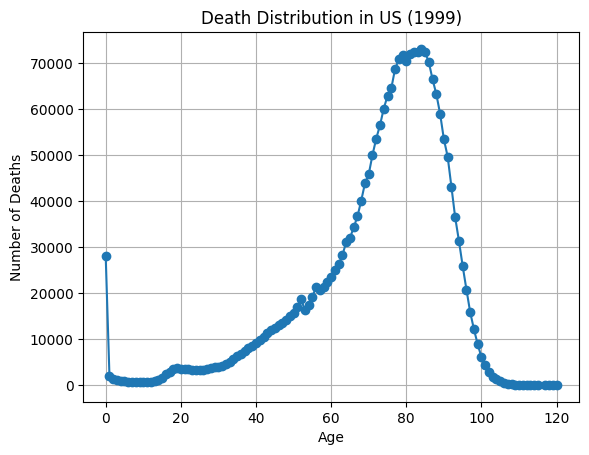

In [ ]:
#TASK 4
import pandas as pd
import matplotlib.pyplot as plt

# Load death distribution data
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"
death_distribution_data = pd.read_csv(data_url_2, sep='\t', skiprows=[1])

# Drop NaN values from the 'Both Sexes' column
death_distribution_data = death_distribution_data.dropna(subset=['Both Sexes'])

# Plot number of people who died as a function of age
fig, ax = plt.subplots()
ax.plot(death_distribution_data['Age'], death_distribution_data['Both Sexes'], marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Deaths')
ax.set_title('Death Distribution in US (1999)')
plt.grid(True)
plt.show()


The death distribution shows two noticeable peaks:

* A high number of deaths at age 0, reflecting infant mortality.

* A gradual rise from around age 60 onwards, peaking in the 70s–80s, consistent with typical life expectancy.

Very few deaths occur at younger adult ages, suggesting that most people in the dataset lived to older ages before passing.

In [ ]:
#TASK 5
import numpy as np

def P_lh(death_distribution_data, study_year=1990):
    """Overall probability of being left-handed if you died in the study year.
    Input: dataframe of death distribution data, study year
    Output: P(LH), a single floating point number"""

    # Get the age array (drop NaNs from 'Both Sexes' already done in Task 4)
    ages_of_death = death_distribution_data['Age'].values

    # Get the number of deaths for each age
    N_A = death_distribution_data['Both Sexes'].values

    # Get the probability of being left-handed for each age
    P_LH_given_A = P_lh_given_A(ages_of_death, study_year=study_year)

    # Multiply deaths by LH probability for each age to get p_list
    p_list = N_A * P_LH_given_A

    # Total expected number of left-handed people who died
    p = np.sum(p_list)

    # Normalize by total deaths to get the overall probability
    return p / np.sum(N_A)

# Example usage
print("P(Left-Handed | Died in 1990):", P_lh(death_distribution_data))


P(Left-Handed | Died in 1990): 0.07766387615350638


**P(Left-Handed | Died in 1990):** ≈ 7.77%

This means that around 7.77% of people who died in 1990 were left-handed, based on the death distribution and handedness data from historical surveys.

This relatively low percentage can be influenced by:

* Lower left-handed rates in older generations.

* Higher mortality among left-handers at younger ages (as some past studies controversially suggested).

* The shift in left-handed acceptance across birth cohorts, shown in your earlier plots.

In [ ]:
#TASK 6
def P_A_given_lh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're left-handed """
    # Total number of deaths
    total_deaths = death_distribution_data['Both Sexes'].sum()

    # P(A): Probability of dying at age A
    P_A = death_distribution_data.set_index('Age').loc[ages_of_death, 'Both Sexes'].values / total_deaths

    # P(LH): Overall probability of being left-handed (from Task 5)
    P_left = P_lh(death_distribution_data, study_year)

    # P(LH | A): Probability of being left-handed given age (from Task 3)
    P_lh_A = P_lh_given_A(ages_of_death, study_year)

    # Apply Bayes' Theorem: P(A | LH) = [P(LH | A) * P(A)] / P(LH)
    return (P_lh_A * P_A) / P_left

ages = np.array([20, 40, 60, 80])
print(P_A_given_lh(ages, death_distribution_data))



IndentationError: unexpected indent (1445520257.py, line 2)